In [12]:
import pandas as pd
import seaborn as sns
import imdb

In [13]:
fetcher = imdb.IMDb()

In [3]:
top250 = pd.read_csv("./custom_csv_files/top250.csv")

In [4]:
top250 = top250.drop(['Unnamed: 0'], axis = 1)

In [5]:
num_per_year = top250.groupby(['Year']).count()['ID']

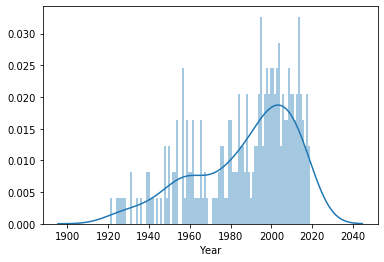

In [6]:
plot = sns.distplot(top250['Year'], bins = 100)

In [7]:
top250

,ID,Title,Year,Star1,Star2,Star3,Star4,Star5
0,111161,The Shawshank Redemption,1994,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,Clancy Brown
1,68646,The Godfather,1972,Marlon Brando,Al Pacino,James Caan,Richard S. Castellano,Robert Duvall
2,71562,The Godfather: Part II,1974,Al Pacino,Robert Duvall,Diane Keaton,Robert De Niro,John Cazale
3,468569,The Dark Knight,2008,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Maggie Gyllenhaal
4,50083,12 Angry Men,1957,Martin Balsam,John Fiedler,Lee J. Cobb,E.G. Marshall,Jack Klugman
5,108052,Schindler's List,1993,Liam Neeson,Ben Kingsley,Ralph Fiennes,Caroline Goodall,Jonathan Sagall
6,167260,The Lord of the Rings: The Return of the King,2003,Noel Appleby,Ali Astin,Sean Astin,David Aston,John Bach
7,110912,Pulp Fiction,1994,Tim Roth,Amanda Plummer,Laura Lovelace,John Travolta,Samuel L. Jackson
8,60196,"The Good, the Bad and the Ugly",1966,Eli Wallach,Clint Eastwood,Lee Van Cleef,Aldo Giuffrè,Luigi Pistilli
9,137523,Fight Club,1999,Edward Norton,Brad Pitt,Meat Loaf,Zach Grenier,Richmond Arquette


In [8]:
best_actors = top250['Star2'].append(top250['Star1'], ignore_index = True).append(top250['Star3'], ignore_index = True).append(top250['Star4'], ignore_index = True).value_counts()

In [9]:
best_actors

Robert De Niro           7
Tom Hanks                7
Aamir Khan               6
Harrison Ford            6
Leonardo DiCaprio        6
Clint Eastwood           5
Jack Nicholson           4
Brad Pitt                4
Morgan Freeman           4
Tom Hardy                4
Charles Chaplin          4
Al Pacino                4
Mark Ruffalo             4
James Stewart            4
Christian Bale           4
Tim Allen                3
William Holden           3
Chris Hemsworth          3
Mark Hamill              3
Gunnar Björnstrand       3
Ralph Fiennes            3
Takashi Shimura          3
Toshirô Mifune           3
Marlon Brando            3
Jack Hawkins             3
Carrie Fisher            3
Russell Crowe            3
Ethan Hawke              3
Joe Pesci                3
Hugh Jackman             3
                        ..
Akira Terao              1
Jean Arthur              1
Brahim Hadjadj           1
Joan Allen               1
Stephen Fry              1
Fred Willard             1
G

In [15]:
best_actors_df = pd.DataFrame(best_actors[best_actors > 1])


In [24]:
best = best_actors.index[0]

In [39]:
fetcher.search_person(best)[0].getID()

'0000134'

In [48]:
## Add birth dates and death dates if applicable

In [48]:
def get_person_ID(ser):
    out = []
    for i in range(len(ser)):
        out.append(fetcher.search_person(ser[i])[0].getID())
    return out

In [50]:
Star1_IDs = get_person_ID(top250['Star1'])

In [52]:
# is there a specific way that methods aggregate to be applied over entire series or lists without 
# cycling through each element like I am being forced to here?

In [54]:
len(Star1_IDs)

250

In [ ]:
# map the birth place of these top 250 actors on a map
# hover over each point to show the date and name of the person